<a href="https://colab.research.google.com/github/hamadbinghanem/masar/blob/main/FinalProject_PartI_HamadBinGhanem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


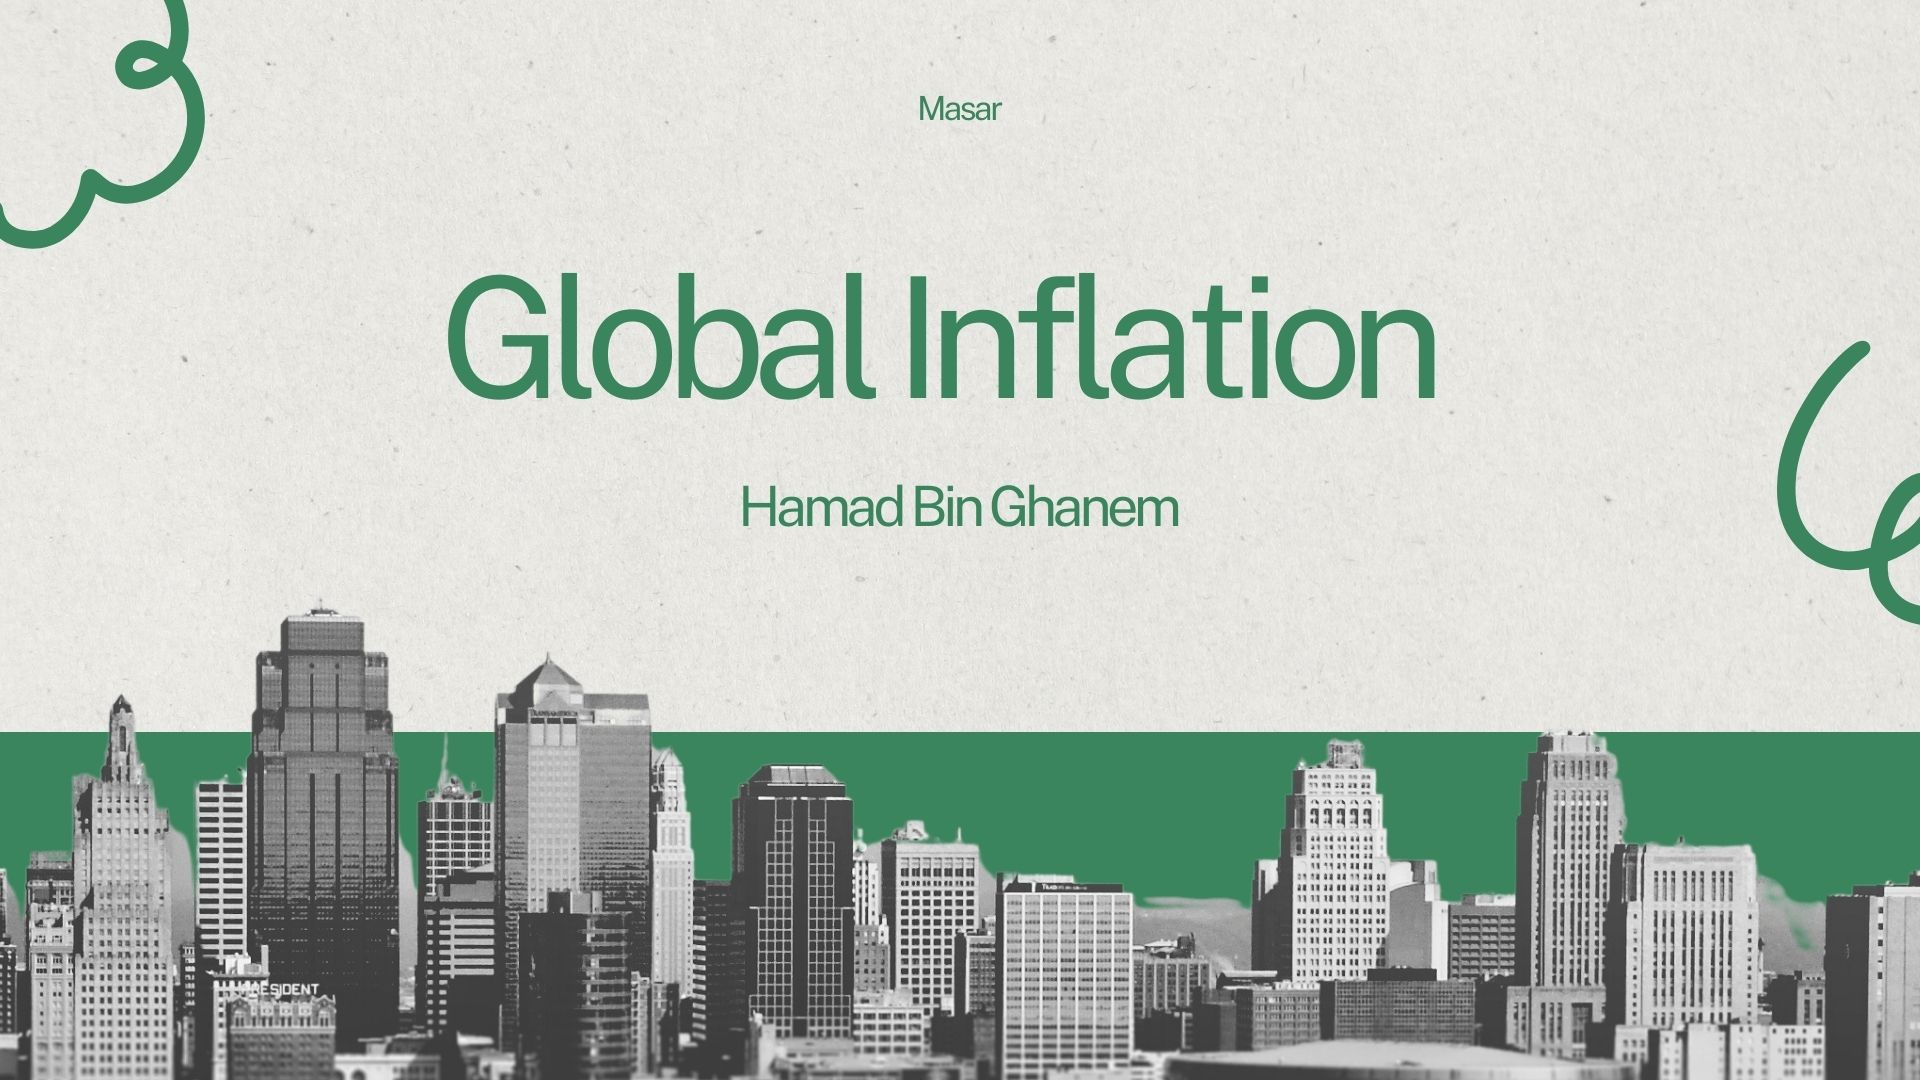

**Table of Content**

>[Part1: Introduction](#scrollTo=iXn7lH-kCDh4)

>[Part2: Data Cleaning and Processing](#scrollTo=T9F3stOiC56i)

>>[Step 1 Call all libraries](#scrollTo=T9F3stOiC56i)

>>[Step 2 Import Data](#scrollTo=T9F3stOiC56i)

>>[Step 3 Visual Data](#scrollTo=T9F3stOiC56i)

>>[Step 4 Check missing values (Nah)](#scrollTo=tz2Y3b3Jzstg)

>>[Step 5 Replace missing values with mean of same country](#scrollTo=wJNiUJ525JYB)

>>[Step 6 check highest and lowesr mean inflation rate](#scrollTo=DZTAPUCQcdFy)

>[Part3: Data Visulaztaion](#scrollTo=DiOZouYcGU-R)

>>[Step 1 Chose Date to Visulaztaion](#scrollTo=DiOZouYcGU-R)

>>[Step 2 plot Fiqure for Inflation Trend Over Time with Venezuela](#scrollTo=DiOZouYcGU-R)

>>[Step 3 plot Fiqure for Inflation Trend Over Time without Venezuela](#scrollTo=ZgXI0tY5dRCj)

>>[Step 4 plot Heatmap of Inflation Rates for Selected Countries Over Time](#scrollTo=1srCjyFxd-Co)

>>[Step 5 plot Bar Chart of Average Inflation Rate from 2000 to 2020 for Selected Countries](#scrollTo=VffOScC5eORR)

>[Part 4 Machine Learning algorithms](#scrollTo=gNRZ2h7Jesf8)

>>[Step 1 KMeans Machine Learning algorithms](#scrollTo=gNRZ2h7Jesf8)

>>[Step 2 scatter plot along with the regression](#scrollTo=YiIt5_1p0BLs)

>>[Step 2 Predictions and Accuracy](#scrollTo=CI3kHaOi0Iy9)



# **Part1: Introduction**
This project undertakes an analysis of global inflation trends, leveraging a dataset that spans from 1980 to 2024 and covers annual inflation rates across various countries. The aim is to dissect inflation's evolution over time, understand regional economic disparities, and visualize these dynamics for clearer insights.


# Part2: Data Cleaning and Processing
## Step 1 Call all libraries
## Step 2 Import Data
## Step 3 Visual Data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [291]:
# Load the dataset

# The Dataset from https://www.kaggle.com/datasets/sazidthe1/global-inflation-data

data_path = '/content/global_inflation_data.csv'
df = pd.read_csv(data_path)
df.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


In [292]:
# get the column
df.columns

Index(['country_name', 'indicator_name', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

## Step 4 Check missing values (Nah)

In [293]:
#check the null (missing values)
df.isnull()
d = 'Y'
dd= ' Y'
ddd= '  Y'
d_1 = ''

In [294]:
#check how many missing values
df.isnull().sum()

country_name       0
indicator_name     0
1980              56
1981              52
1982              51
1983              51
1984              51
1985              51
1986              51
1987              49
1988              49
1989              49
1990              46
1991              41
1992              38
1993              27
1994              25
1995              24
1996              20
1997              17
1998              15
1999              14
2000              13
2001               9
2002               7
2003               6
2004               5
2005               3
2006               3
2007               3
2008               3
2009               3
2010               3
2011               4
2012               3
2013               2
2014               2
2015               2
2016               2
2017               1
2018               1
2019               1
2020               2
2021               2
2022               2
2023               4
2024               5
dtype: int64

## Step 5 Replace missing values with mean of same country  


In [295]:
# Convert year columns to float
year_columns = df.columns[2:]  # Assuming first two columns are non-year related
df[year_columns] = df[year_columns].astype(float)

# Replace missing values with the mean inflation rate of the same country
for country in df['country_name'].unique():
    for year in year_columns:
        mean_value = df[df['country_name'] == country][year].mean()
        df.loc[df['country_name'] == country, year] = df[df['country_name'] == country][year].fillna(mean_value)

In [296]:
# dropping the missing values
df = df.dropna()
#check how many missing values
df.isnull().sum()
df.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.8,6.4,5.6,4.3,2.0,2.4,7.2,9.3,9.0,6.8
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.2,30.7,29.8,19.6,17.1,22.3,25.8,21.4,13.1,22.3
5,Antigua and Barbuda,Annual average inflation (consumer prices) rate,19.0,11.5,4.2,2.3,3.8,1.0,0.5,3.6,...,1.0,-0.5,2.4,1.2,1.4,1.1,1.6,7.5,5.0,2.9
9,Australia,Annual average inflation (consumer prices) rate,10.1,9.5,11.4,10.0,4.0,6.7,9.1,8.5,...,1.5,1.3,2.0,1.9,1.6,0.9,2.8,6.6,5.8,4.0
10,Austria,Annual average inflation (consumer prices) rate,6.3,6.8,5.4,3.3,5.7,3.2,1.7,1.4,...,0.8,1.0,2.2,2.1,1.5,1.4,2.8,8.6,7.8,3.7


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 2 to 194
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    136 non-null    object 
 1   indicator_name  136 non-null    object 
 2   1980            136 non-null    float64
 3   1981            136 non-null    float64
 4   1982            136 non-null    float64
 5   1983            136 non-null    float64
 6   1984            136 non-null    float64
 7   1985            136 non-null    float64
 8   1986            136 non-null    float64
 9   1987            136 non-null    float64
 10  1988            136 non-null    float64
 11  1989            136 non-null    float64
 12  1990            136 non-null    float64
 13  1991            136 non-null    float64
 14  1992            136 non-null    float64
 15  1993            136 non-null    float64
 16  1994            136 non-null    float64
 17  1995            136 non-null    flo

In [298]:
# get the column
df.columns

Index(['country_name', 'indicator_name', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')


## Step 6 Check highest and lowesr mean inflation rate



In [299]:
# Calculate the mean inflation rate for each country across all years
df['mean_inflation'] = df[year_columns].mean(axis=1)

# Find the country with the highest mean inflation rate
highest_mean_country = df.loc[df['mean_inflation'].idxmax()]

# Find the country with the lowest mean inflation rate
lowest_mean_country = df.loc[df['mean_inflation'].idxmin()]

table = pd.DataFrame({
    "Country": [highest_mean_country['country_name'], lowest_mean_country['country_name']],
    "Mean Inflation Rate (%)": [highest_mean_country['mean_inflation'], lowest_mean_country['mean_inflation']]
})

# Setting the index for better readability
table.index = ["Highest Mean Inflation", "Lowest Mean Inflation"]

# Display the table
print(table)

                          Country  Mean Inflation Rate (%)
Highest Mean Inflation  Venezuela              2041.728889
Lowest Mean Inflation       Japan                 1.071111


# Part3: Data Visulaztaion
## Step 1 Chose Date to Visulaztaion
## Step 2 plot Fiqure for Inflation Trend Over Time with Venezuela


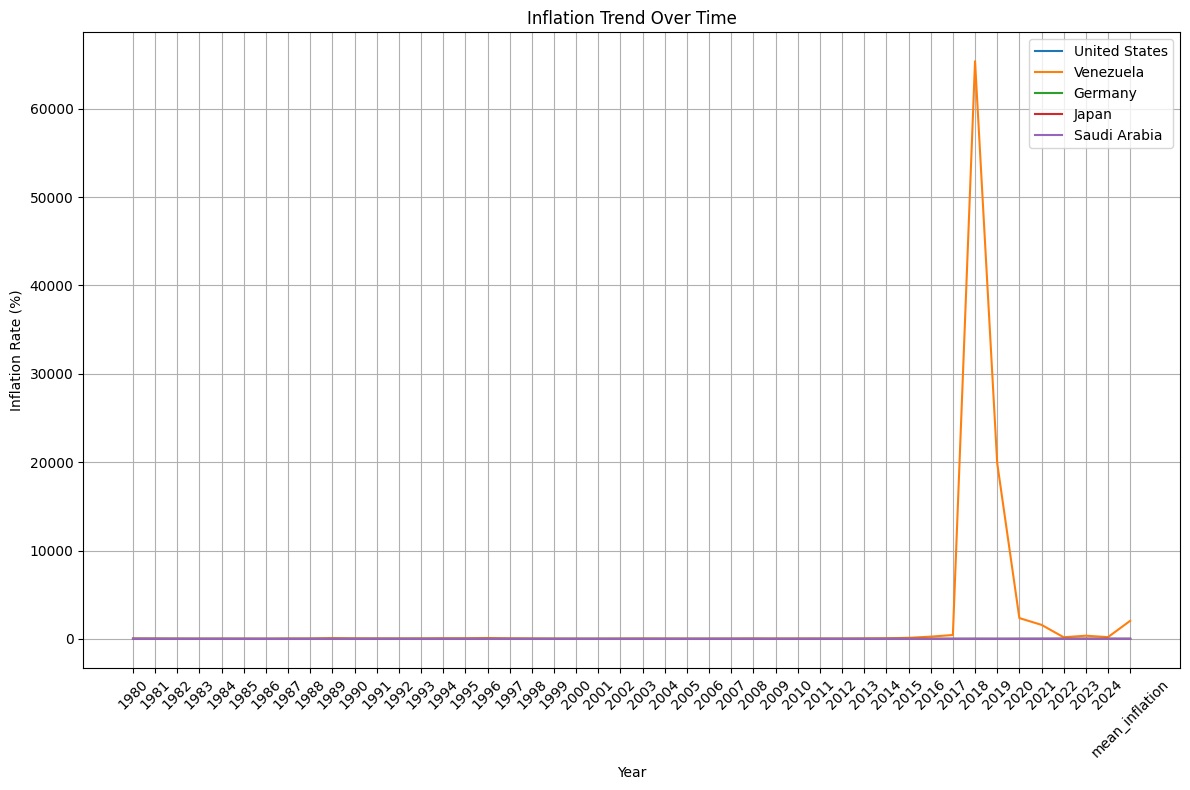

In [300]:
# Convert year columns to float
year_columns = df.columns[2:]  # Assuming first two columns are non-year related
df[year_columns] = df[year_columns].astype(float)

# Filter data for a subset of countries for demonstration
selected_countries = ['United States', 'Venezuela', 'Germany', 'Japan','Saudi Arabia']
filtered_df = df[df['country_name'].isin(selected_countries)]

# Data Visualization

# Plot inflation trend over time for selected countries
plt.figure(figsize=(12, 8))
for country in selected_countries:
    country_data = filtered_df[filtered_df['country_name'] == country]
    plt.plot(year_columns, country_data.iloc[0][2:], label=country)  # Skip first two columns

plt.title('Inflation Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 3 plot Fiqure for Inflation Trend Over Time without Venezuela



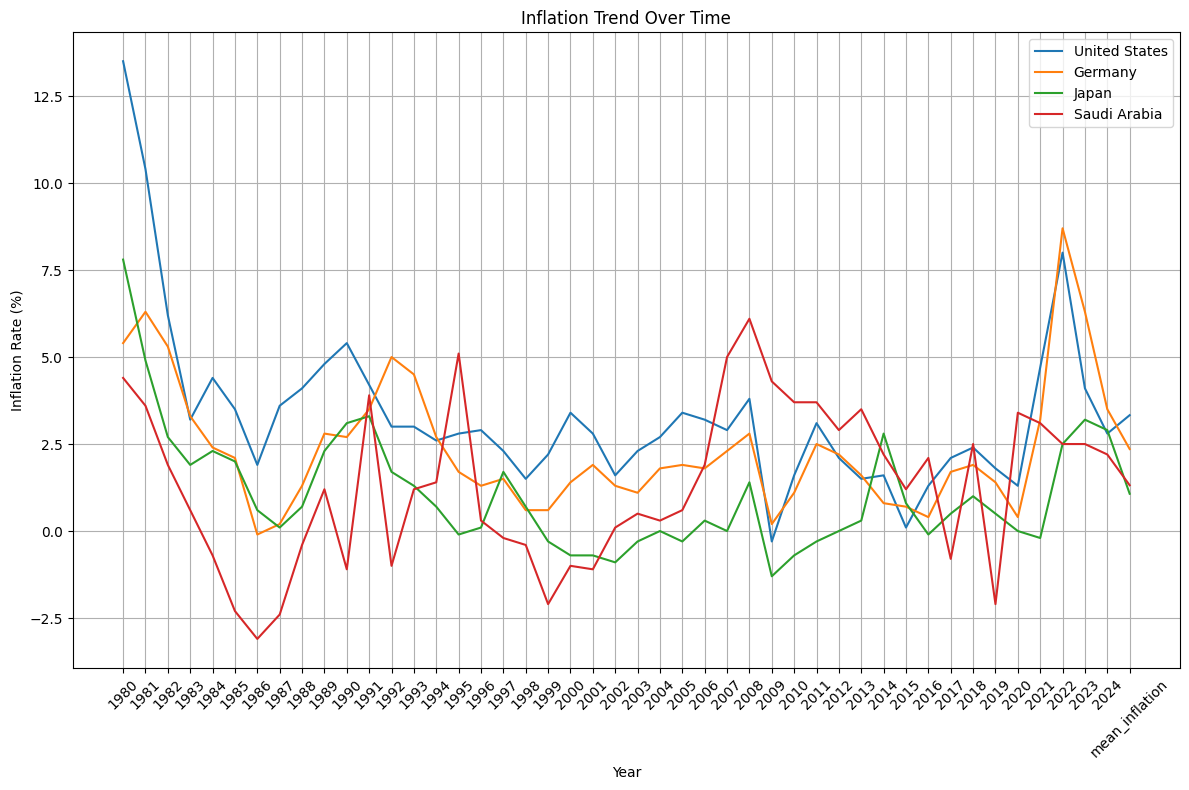

In [301]:
# Convert year columns to float
year_columns = df.columns[2:]  # Assuming first two columns are non-year related
df[year_columns] = df[year_columns].astype(float)

# Filter data for a subset of countries for demonstration
selected_countries = ['United States', 'Germany', 'Japan','Saudi Arabia']
filtered_df = df[df['country_name'].isin(selected_countries)]

# Data Visualization

# Plot inflation trend over time for selected countries
plt.figure(figsize=(12, 8))
for country in selected_countries:
    country_data = filtered_df[filtered_df['country_name'] == country]
    plt.plot(year_columns, country_data.iloc[0][2:], label=country)  # Skip first two columns

plt.title('Inflation Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 4 plot Heatmap of Inflation Rates for Selected Countries Over Time


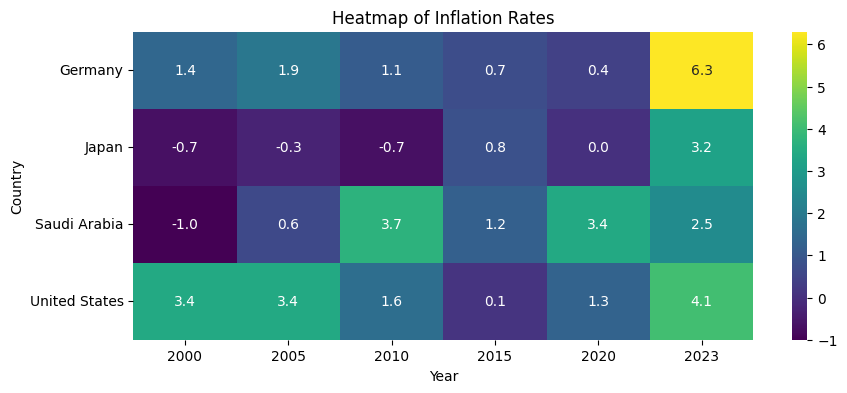

In [302]:


# Heatmap of Inflation Rates for Selected Countries Over Time
# Select a subset of years for clarity in visualization
selected_years = ['2000', '2005', '2010', '2015', '2020', '2023']
heatmap_data = filtered_df.set_index('country_name')[selected_years]

plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f")
plt.title('Heatmap of Inflation Rates')
plt.ylabel('Country')
plt.xlabel('Year')
plt.show()



## Step 5 plot Bar Chart of Average Inflation Rate from 2000 to 2020 for Selected Countries


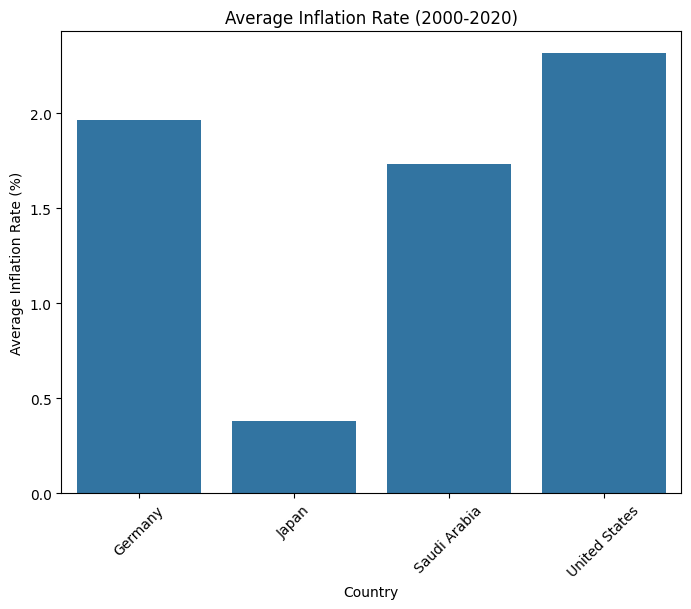

In [303]:

# Bar Chart of Average Inflation Rate from 2000 to 2020 for Selected Countries
avg_inflation = filtered_df[selected_years].mean(axis=1)
plt.figure(figsize=(8, 6))
sns.barplot(x=filtered_df['country_name'], y=avg_inflation)
plt.title('Average Inflation Rate (2000-2020)')
plt.xlabel('Country')
plt.ylabel('Average Inflation Rate (%)')
plt.xticks(rotation=45)
plt.show()

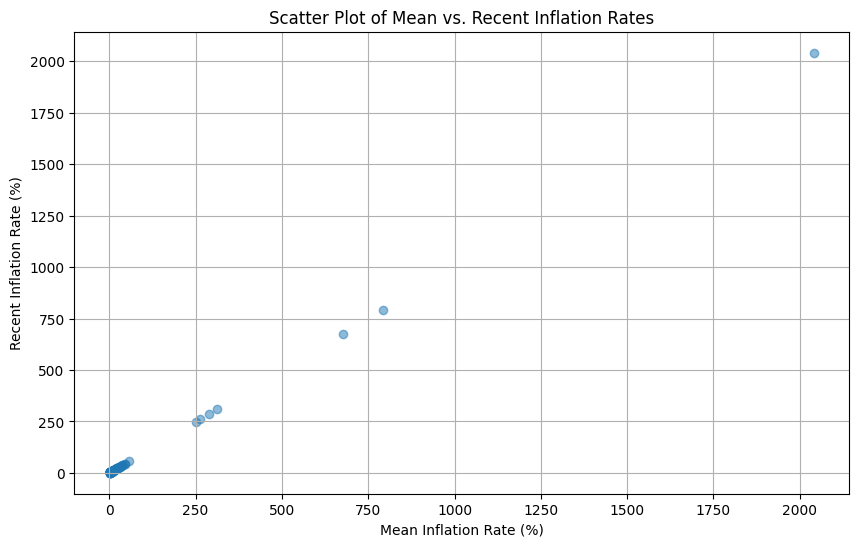

In [304]:


# Convert year columns to float for calculation
year_columns = df.columns[2:]  # Assuming the first two columns are non-year related
df[year_columns] = df[year_columns].astype(float)

# Calculate the mean inflation rate for each country across all years
df['mean_inflation'] = df[year_columns].mean(axis=1)

# Extract the most recent year's inflation rate for each country
# Assuming the last column is the most recent year
df['recent_inflation'] = df[year_columns[-1]]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['mean_inflation'], df['recent_inflation'], alpha=0.5)

# Labeling
plt.title('Scatter Plot of Mean vs. Recent Inflation Rates')
plt.xlabel('Mean Inflation Rate (%)')
plt.ylabel('Recent Inflation Rate (%)')
plt.grid(True)

# Show plot
plt.show()

# Part 4 Machine Learning algorithms
## Step 1 KMeans Machine Learning algorithms

In [305]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mean_inflation','recent_inflation']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0], dtype=int32)

In [306]:
df['cluster']=y_predicted
df.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2018,2019,2020,2021,2022,2023,2024,mean_inflation,recent_inflation,cluster
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.3,2.0,2.4,7.2,9.3,9.0,6.8,8.491111,8.491111,0
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,19.6,17.1,22.3,25.8,21.4,13.1,22.3,249.820000,249.820000,0
5,Antigua and Barbuda,Annual average inflation (consumer prices) rate,19.0,11.5,4.2,2.3,3.8,1.0,0.5,3.6,...,1.2,1.4,1.1,1.6,7.5,5.0,2.9,3.233333,3.233333,0
9,Australia,Annual average inflation (consumer prices) rate,10.1,9.5,11.4,10.0,4.0,6.7,9.1,8.5,...,1.9,1.6,0.9,2.8,6.6,5.8,4.0,4.051111,4.051111,0
10,Austria,Annual average inflation (consumer prices) rate,6.3,6.8,5.4,3.3,5.7,3.2,1.7,1.4,...,2.1,1.5,1.4,2.8,8.6,7.8,3.7,2.693333,2.693333,0


## Step 2 scatter plot along with the regression

Slope: 1.0
Intercept: 0.0
R-squared: 1.0
P-value: 0.0
Standard error: 0.0


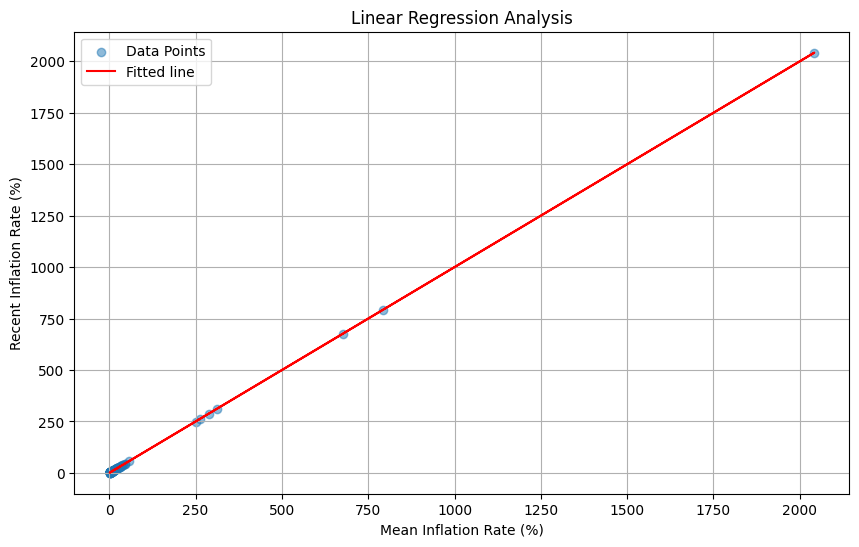

In [307]:
# Calculate the mean inflation rate for each country across all years
df['mean_inflation'] = df[year_columns].mean(axis=1)

# Extract the most recent year's inflation rate for each country
# Assuming the last column is the most recent year
df['recent_inflation'] = df[year_columns[-1]]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['mean_inflation'], df['recent_inflation'])

# Print out the results of the linear regression
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Plotting the scatter plot along with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['mean_inflation'], df['recent_inflation'], alpha=0.5, label='Data Points')
plt.plot(df['mean_inflation'], intercept + slope * df['mean_inflation'], 'r', label='Fitted line')

# Labeling
plt.title('Linear Regression Analysis')
plt.xlabel('Mean Inflation Rate (%)')
plt.ylabel('Recent Inflation Rate (%)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


## Step 2 Predictions and Accuracy

In [308]:
# Create a binary outcome based on the median recent inflation rate
median_inflation = df['recent_inflation'].median()
df['inflation_high'] = (df['recent_inflation'] > median_inflation).astype(int)

# Define features and target variable
X = df[['mean_inflation']]  # Features: mean inflation rate
y = df['inflation_high']    # Target: binary classification of inflation

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.7857142857142857
